In [1]:
import ikpy
import numpy as np
from ikpy import plot_utils

my_chain = ikpy.chain.Chain.from_urdf_file("./niryo_one.urdf")



In [5]:
#target_vector = [ 0.1, -0.2, 0.5]
target_vector = [ 0.05, 0.05, 0.30]
target_frame = np.eye(4)
target_frame[0,0] = 0.5
target_frame[1,1] = 0.5
target_frame[:3, 3] = target_vector
print(target_frame)

# target_frame1 = [[1, 0, 0, 0.25],
#                  [0, 1, 0, 0.25],
#                  [0, 0, 1, 0.25],
#                  [0, 0, 0, 1]]

# target_frame2 = [[1, 0, 0, 0.25],
#                  [0, 1, 0, 0.25],
#                  [0, 0, 1, 0.25],
#                  [0, 0, 0, 1]]

# angles1 = my_chain.inverse_kinematics(target_frame1)
# angles2 = my_chain.inverse_kinematics(target_frame2)

angles = my_chain.inverse_kinematics(target_frame)
print("The angles of each joints are :")

for i in range(len(angles)):
    print(round(angles[i]* (180 / np.pi)))
        
# print("---Original---     ----NEW----")
# for i in range(len(angles1)):
#     one = round(angles1[i]* (180 / np.pi))
#     two = round(angles2[i]* (180 / np.pi))
#     if (one != two):
#         print("   ", one, "               ", two, "  <<<< Different values")
#     else:
#         print("   ", one, "               ", two)
    
real_frame = my_chain.forward_kinematics(angles)
print("Computed position vector : %s, original position vector : %s" % (real_frame[:3, 3], target_frame[:3, 3]))

[[0.5  0.   0.   0.05]
 [0.   0.5  0.   0.05]
 [0.   0.   1.   0.3 ]
 [0.   0.   0.   1.  ]]
The angles of each joints are :
0.0
45.0
37.0
-53.0
-0.0
-100.0
0.0
0.0
Computed position vector : [0.05637832 0.05637796 0.29763575], original position vector : [0.05 0.05 0.3 ]


<IPython.core.display.Javascript object>


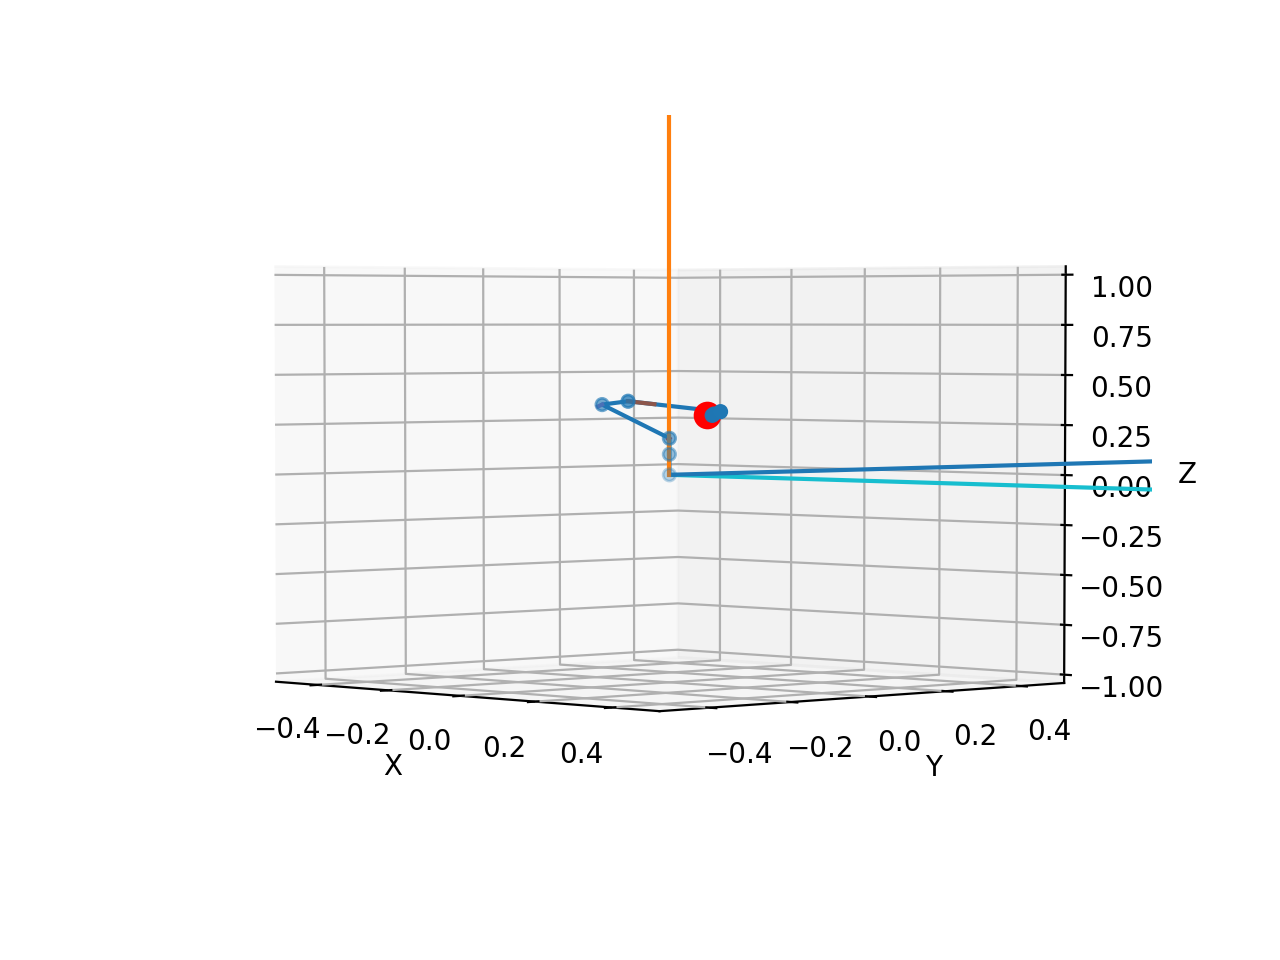

(-0.5, 0.5)

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
ax = plot_utils.init_3d_figure()
my_chain.plot(my_chain.inverse_kinematics(target_frame), ax, target=target_vector)
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)